In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.models import load_model
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import itertools
import random
import os
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
GOOGLE = pd.read_csv("GOOGLE.csv")
SPX = pd.read_csv("SPX_1.csv")

# Data Cleaning and Preparation

In [ ]:
SPX.rename(columns={'Adj Close': 'Adj_Close_SPX'}, inplace=True)
GOOGLE.rename(columns={'Adj Close': 'Adj_Close'}, inplace=True)

In [ ]:
GOOGLE['SPX_Adj_Close'] = SPX.Adj_Close_SPX


In [ ]:
GOOGLE.head()

,Date,Open,High,Low,Close,Adj_Close,Volume,SPX_Adj_Close
0,2018-10-09,57.307499,57.717499,56.878601,56.941002,56.941002,26174000,2880.340088
1,2018-10-10,56.554001,56.608501,54.056499,54.061001,54.061001,53514000,2785.679932
2,2018-10-11,53.646999,55.320000,53.413502,53.966000,53.966000,58980000,2728.370117
3,2018-10-12,55.400002,55.750000,54.320099,55.504002,55.504002,42026000,2767.129883
4,2018-10-15,55.445499,55.672298,54.450001,54.612499,54.612499,27448000,2750.790039


In [ ]:
# Extract the features (independent variables) and target (dependent variable)
features = GOOGLE[['Open', 'High', 'Low', 'Adj_Close','SPX_Adj_Close' ]]
target = GOOGLE['Adj_Close'].shift(-1)  # Shift target to represent "tomorrow"



In [ ]:
features.info()
features.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           1258 non-null   float64
 1   High           1258 non-null   float64
 2   Low            1258 non-null   float64
 3   Adj_Close      1258 non-null   float64
 4   SPX_Adj_Close  1257 non-null   float64
dtypes: float64(5)
memory usage: 49.3 KB


Open             0
High             0
Low              0
Adj_Close        0
SPX_Adj_Close    1
dtype: int64

In [ ]:
features = features.dropna()
features.isna().sum()
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1257 entries, 0 to 1256
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           1257 non-null   float64
 1   High           1257 non-null   float64
 2   Low            1257 non-null   float64
 3   Adj_Close      1257 non-null   float64
 4   SPX_Adj_Close  1257 non-null   float64
dtypes: float64(5)
memory usage: 58.9 KB


In [ ]:
features.tail()

,Open,High,Low,Adj_Close,SPX_Adj_Close
1252,132.154999,135.360001,132.065002,135.169998,4288.390137
1253,134.929993,135.240005,132.815002,133.300003,4229.450195
1254,133.660004,136.570007,133.429993,136.270004,4263.750000
1255,136.130005,136.500000,134.455002,135.990005,4258.189941
1256,134.940002,139.186005,134.940002,138.729996,4308.500000


In [ ]:
target = target[:-1]


In [ ]:
target.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1257 entries, 0 to 1256
Series name: Adj_Close
Non-Null Count  Dtype  
--------------  -----  
1257 non-null   float64
dtypes: float64(1)
memory usage: 9.9 KB


In [ ]:
# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)
target_scaled = scaler.fit_transform(target.values.reshape(-1, 1))

# LSTM Multivariate Model Training


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target_scaled, test_size=0.2, shuffle=False)

# Reshape the data for LSTM input (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Compling the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history= model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
32/32 [==============================] - 9s 6ms/step - loss: 0.1749
Epoch 2/50
32/32 [==============================] - 0s 5ms/step - loss: 0.0565
Epoch 3/50
32/32 [==============================] - 0s 6ms/step - loss: 0.0087
Epoch 4/50
32/32 [==============================] - 0s 5ms/step - loss: 0.0050
Epoch 5/50
32/32 [==============================] - 0s 5ms/step - loss: 0.0034
Epoch 6/50
32/32 [==============================] - 0s 6ms/step - loss: 0.0023
Epoch 7/50
32/32 [==============================] - 0s 6ms/step - loss: 0.0016
Epoch 8/50
32/32 [==============================] - 0s 6ms/step - loss: 0.0011
Epoch 9/50
32/32 [==============================] - 0s 5ms/step - loss: 8.8813e-04
Epoch 10/50
32/32 [==============================] - 0s 5ms/step - loss: 7.5751e-04
Epoch 11/50
32/32 [==============================] - 0s 5ms/step - loss: 6.8691e-04
Epoch 12/50
32/32 [==============================] - 0s 5ms/step - loss: 6.4668e-04
Epoch 13/50
32/32 [==============

In [ ]:
# Evaluate the model on the test set
loss = model.evaluate(X_test , y_test)
print(f'Model Loss on Test Set: {loss}')

# Make predictions on the test set
predictions = model.predict(X_test)

# Invert the scaling for both predictions and actual values
predictions_inv = scaler.inverse_transform(predictions)
y_test_inv = scaler.inverse_transform(y_test)


8/8 [==============================] - 0s 3ms/step - loss: 7.0929e-04
Model Loss on Test Set: 0.0007092909654602408
8/8 [==============================] - 0s 2ms/step


# Model prediction and Evaluation Results

In [ ]:


# Evaluate the performance using additional metrics
rmse = np.sqrt(mean_squared_error(y_test_inv, predictions_inv))
mae = mean_absolute_error(y_test_inv, predictions_inv)

print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')

RMSE: 2.7138
MAE: 2.1749


<ipython-input-19-6ac98009c7b5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid2['Predictions'] = predictions_inv


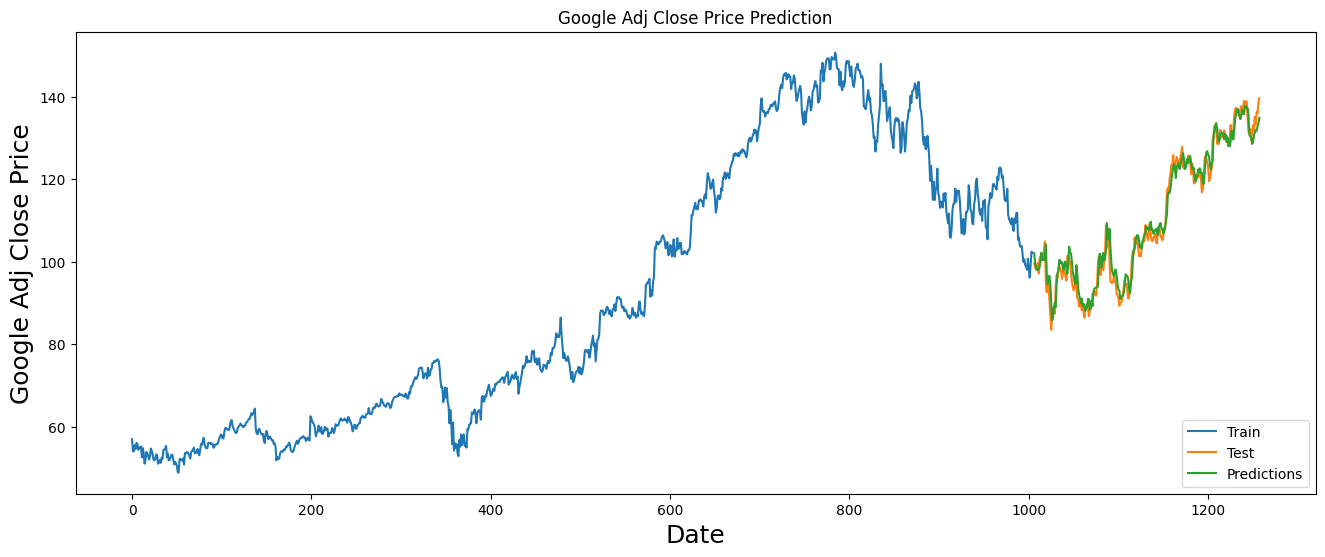

In [ ]:
X_train_len = len(X_train)
valid2 = GOOGLE[X_train_len+1:]
valid2['Predictions'] = predictions_inv

# Visualize the data
plt.figure(figsize=(16, 6))
plt.title('Google Adj Close Price Prediction')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Google Adj Close Price', fontsize=18)

# Plotting training data
plt.plot(GOOGLE['Adj_Close'][:X_train_len], label='Train')

# Plotting testing data
plt.plot(valid2['Adj_Close'], label='Test')

# Plotting predictions
plt.plot(valid2['Predictions'], label='Predictions')

plt.legend(loc='lower right')
plt.show()


# Optimization


In [ ]:
from tensorflow.keras.optimizers import Adam

# Create a custom optimizer with a learning rate of 0.3
custom_optimizer = Adam(learning_rate=0.3)

model_optimize = Sequential()
model_optimize.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model_optimize.add(Dropout(0.2))  # Add dropout after the first LSTM layer
model_optimize.add(LSTM(units=50, activation='relu', return_sequences=True))
model_optimize.add(Dropout(0.2))  # Add dropout after the second LSTM layer
model_optimize.add(LSTM(units=50, activation='relu'))
model_optimize.add(Dropout(0.2))  # Add dropout after the third LSTM layer
model_optimize.add(Dense(units=1))




In [ ]:
# Compile the model with the custom optimizer
model_optimize.compile(optimizer=custom_optimizer, loss='mean_squared_error', metrics=['accuracy'])

# Train the model and store the training history
history_optimize = model_optimize.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=2)


Epoch 1/20
32/32 - 4s - loss: 0.1023 - accuracy: 9.9502e-04 - val_loss: 0.1489 - val_accuracy: 0.0000e+00 - 4s/epoch - 126ms/step
Epoch 2/20
32/32 - 1s - loss: 0.1058 - accuracy: 9.9502e-04 - val_loss: 0.0759 - val_accuracy: 0.0000e+00 - 764ms/epoch - 24ms/step
Epoch 3/20
32/32 - 1s - loss: 0.0989 - accuracy: 9.9502e-04 - val_loss: 0.0883 - val_accuracy: 0.0000e+00 - 752ms/epoch - 24ms/step
Epoch 4/20
32/32 - 1s - loss: 0.1020 - accuracy: 9.9502e-04 - val_loss: 0.0725 - val_accuracy: 0.0000e+00 - 747ms/epoch - 23ms/step
Epoch 5/20
32/32 - 1s - loss: 0.1004 - accuracy: 9.9502e-04 - val_loss: 0.0545 - val_accuracy: 0.0000e+00 - 671ms/epoch - 21ms/step
Epoch 6/20
32/32 - 0s - loss: 0.0994 - accuracy: 9.9502e-04 - val_loss: 0.0339 - val_accuracy: 0.0000e+00 - 363ms/epoch - 11ms/step
Epoch 7/20
32/32 - 0s - loss: 0.1023 - accuracy: 9.9502e-04 - val_loss: 0.0480 - val_accuracy: 0.0000e+00 - 379ms/epoch - 12ms/step
Epoch 8/20
32/32 - 0s - loss: 0.0987 - accuracy: 9.9502e-04 - val_loss: 0.0580

In [ ]:
# Evaluate the model on the test set
loss = model_optimize.evaluate(X_test , y_test)
print(f'Model Loss on Test Set: {loss}')

# Make predictions on the test set
predictions_optimize = model_optimize.predict(X_test)

# Invert the scaling for both predictions and actual values
predictions_inv = scaler.inverse_transform(predictions_optimize)
y_test_inv = scaler.inverse_transform(y_test)


8/8 [==============================] - 0s 3ms/step - loss: 0.0366 - accuracy: 0.0000e+00
Model Loss on Test Set: [0.03660213574767113, 0.0]
8/8 [==============================] - 0s 3ms/step


In [ ]:
# Evaluate the performance using additional metrics
rmse_optimize = np.sqrt(mean_squared_error(y_test_inv, predictions_inv))
mae_optimize = mean_absolute_error(y_test_inv, predictions_inv)

print(f'RMSE: {rmse_optimize:.4f}')
print(f'MAE: {mae_optimize:.4f}')

RMSE: 19.4948
MAE: 15.1304


Dropout is not performing well, hence we will drop the dropout layers and optimize it well

In [42]:
from tensorflow.keras.optimizers import Adam

# Create a custom optimizer with a learning rate of 0.5
custom_optimizer = Adam(learning_rate=0.5)

model_optimize = Sequential()
model_optimize.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model_optimize.add(LSTM(units=50, activation='relu', return_sequences=True))
model_optimize.add(LSTM(units=50, activation='relu'))
model_optimize.add(Dense(units=1))

# Compile the model with the custom optimizer
model_optimize.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Train the model and store the training history
history_optimize = model_optimize.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=2)



Epoch 1/50
32/32 - 5s - loss: 0.2422 - accuracy: 9.9502e-04 - val_loss: 0.2827 - val_accuracy: 0.0000e+00 - 5s/epoch - 142ms/step
Epoch 2/50
32/32 - 0s - loss: 0.1225 - accuracy: 9.9502e-04 - val_loss: 0.0043 - val_accuracy: 0.0000e+00 - 406ms/epoch - 13ms/step
Epoch 3/50
32/32 - 0s - loss: 0.0156 - accuracy: 0.0020 - val_loss: 0.0010 - val_accuracy: 0.0000e+00 - 430ms/epoch - 13ms/step
Epoch 4/50
32/32 - 0s - loss: 0.0077 - accuracy: 0.0020 - val_loss: 0.0017 - val_accuracy: 0.0000e+00 - 355ms/epoch - 11ms/step
Epoch 5/50
32/32 - 0s - loss: 0.0051 - accuracy: 0.0020 - val_loss: 0.0033 - val_accuracy: 0.0000e+00 - 446ms/epoch - 14ms/step
Epoch 6/50
32/32 - 1s - loss: 0.0041 - accuracy: 0.0020 - val_loss: 0.0040 - val_accuracy: 0.0000e+00 - 1s/epoch - 42ms/step
Epoch 7/50
32/32 - 1s - loss: 0.0029 - accuracy: 0.0020 - val_loss: 0.0018 - val_accuracy: 0.0000e+00 - 1s/epoch - 40ms/step
Epoch 8/50
32/32 - 1s - loss: 0.0019 - accuracy: 0.0020 - val_loss: 0.0011 - val_accuracy: 0.0000e+00 - 

In [43]:
# Evaluate the model on the test set
loss = model_optimize.evaluate(X_test , y_test)
print(f'Model Loss on Test Set: {loss}')

# Make predictions on the test set
predictions_optimize = model_optimize.predict(X_test)

# Invert the scaling for both predictions and actual values
predictions_inv = scaler.inverse_transform(predictions_optimize)
y_test_inv = scaler.inverse_transform(y_test)

8/8 [==============================] - 0s 3ms/step - loss: 6.0820e-04 - accuracy: 0.0000e+00
Model Loss on Test Set: [0.0006082018953748047, 0.0]
8/8 [==============================] - 0s 3ms/step


In [44]:
# Evaluate the performance using additional metrics
rmse_optimize = np.sqrt(mean_squared_error(y_test_inv, predictions_inv))
mae_optimize = mean_absolute_error(y_test_inv, predictions_inv)
mape_optimize = np.mean(np.abs((y_test_inv - predictions_inv) / y_test_inv)) * 100

print(f'RMSE: {rmse_optimize:.4f}')
print(f'MAE: {mae_optimize:.4f}')
print(f'MAPE: {mape_optimize:.4f}%')


RMSE: 2.5130
MAE: 1.9916
MAPE: 1.8503%


<ipython-input-34-6ac98009c7b5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid2['Predictions'] = predictions_inv


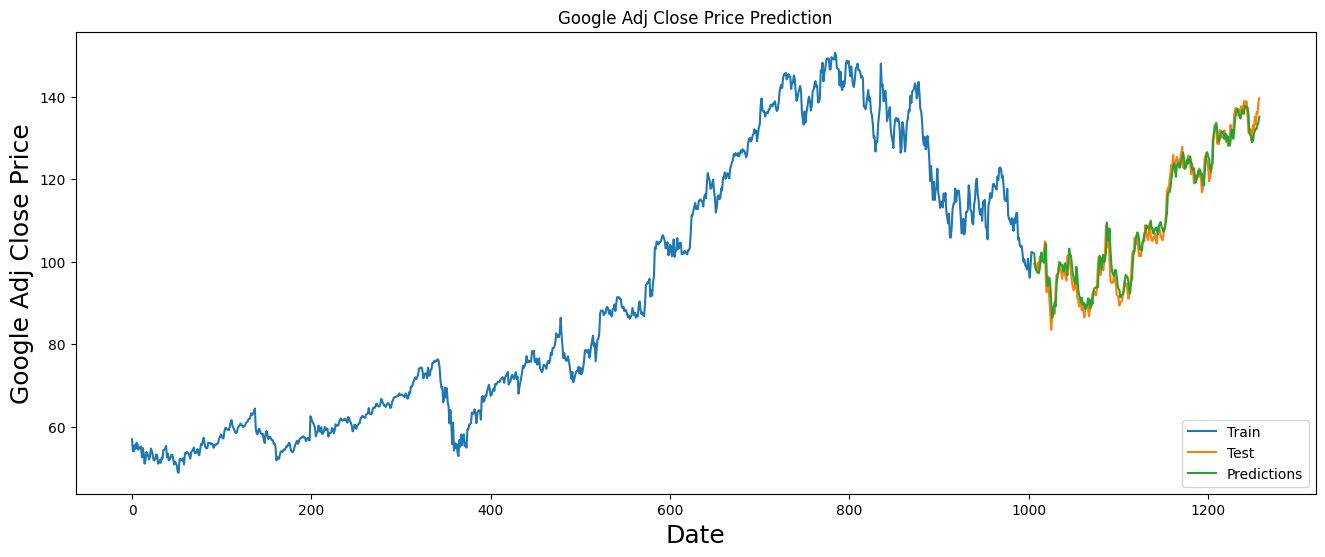

In [ ]:
X_train_len = len(X_train)
valid2 = GOOGLE[X_train_len+1:]
valid2['Predictions'] = predictions_inv

# Visualize the data
plt.figure(figsize=(16, 6))
plt.title('Google Adj Close Price Prediction')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Google Adj Close Price', fontsize=18)

# Plotting training data
plt.plot(GOOGLE['Adj_Close'][:X_train_len], label='Train')

# Plotting testing data
plt.plot(valid2['Adj_Close'], label='Test')

# Plotting predictions
plt.plot(valid2['Predictions'], label='Predictions')

plt.legend(loc='lower right')
plt.show()


In [35]:
from tensorflow.keras.optimizers import Adam

# Create a custom optimizer with a learning rate of 0.5
custom_optimizer = Adam(learning_rate=0.5)

model_optimize = Sequential()
model_optimize.add(LSTM(units=128, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model_optimize.add(LSTM(units=64, activation='relu', return_sequences=True))
model_optimize.add(LSTM(units=64, activation='relu'))  # Adjusted to 64 units
model_optimize.add(Dense(units=1))

# Compile the model with the custom optimizer
model_optimize.compile(optimizer=custom_optimizer, loss='mean_squared_error', metrics=['accuracy'])

# Train the model and store the training history
history_optimize = model_optimize.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=2)


Epoch 1/50
32/32 - 9s - loss: 5466.9565 - accuracy: 9.9502e-04 - val_loss: 0.3458 - val_accuracy: 0.0000e+00 - 9s/epoch - 283ms/step
Epoch 2/50
32/32 - 0s - loss: 0.1328 - accuracy: 9.9502e-04 - val_loss: 0.0324 - val_accuracy: 0.0000e+00 - 404ms/epoch - 13ms/step
Epoch 3/50
32/32 - 0s - loss: 0.1056 - accuracy: 9.9502e-04 - val_loss: 0.0343 - val_accuracy: 0.0000e+00 - 366ms/epoch - 11ms/step
Epoch 4/50
32/32 - 0s - loss: 0.1010 - accuracy: 9.9502e-04 - val_loss: 0.1296 - val_accuracy: 0.0000e+00 - 434ms/epoch - 14ms/step
Epoch 5/50
32/32 - 0s - loss: 0.1082 - accuracy: 9.9502e-04 - val_loss: 0.2118 - val_accuracy: 0.0000e+00 - 374ms/epoch - 12ms/step
Epoch 6/50
32/32 - 0s - loss: 0.1071 - accuracy: 0.0020 - val_loss: 0.0878 - val_accuracy: 0.0000e+00 - 428ms/epoch - 13ms/step
Epoch 7/50
32/32 - 0s - loss: 0.1043 - accuracy: 9.9502e-04 - val_loss: 0.1617 - val_accuracy: 0.0000e+00 - 368ms/epoch - 12ms/step
Epoch 8/50
32/32 - 0s - loss: 0.1083 - accuracy: 9.9502e-04 - val_loss: 0.1205 

In [36]:
# Evaluate the model on the test set
loss = model_optimize.evaluate(X_test , y_test)
print(f'Model Loss on Test Set: {loss}')

# Make predictions on the test set
predictions_optimize = model_optimize.predict(X_test)

# Invert the scaling for both predictions and actual values
predictions_inv = scaler.inverse_transform(predictions_optimize)
y_test_inv = scaler.inverse_transform(y_test)


8/8 [==============================] - 0s 16ms/step - loss: 0.1155 - accuracy: 0.0000e+00
Model Loss on Test Set: [0.11546564102172852, 0.0]
8/8 [==============================] - 3s 6ms/step


In [37]:
# Evaluate the performance using additional metrics
rmse_optimize = np.sqrt(mean_squared_error(y_test_inv, predictions_inv))
mae_optimize = mean_absolute_error(y_test_inv, predictions_inv)

print(f'RMSE: {rmse_optimize:.4f}')
print(f'MAE: {mae_optimize:.4f}')

RMSE: 34.6252
MAE: 30.6223


<ipython-input-38-6ac98009c7b5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid2['Predictions'] = predictions_inv


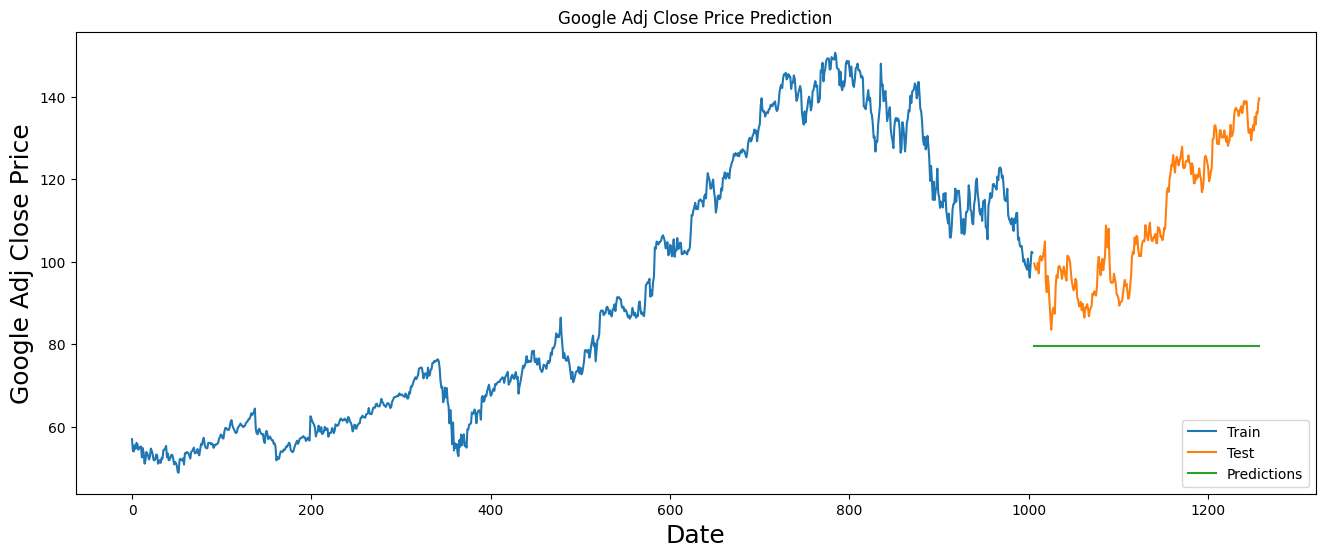

In [38]:
X_train_len = len(X_train)
valid2 = GOOGLE[X_train_len+1:]
valid2['Predictions'] = predictions_inv

# Visualize the data
plt.figure(figsize=(16, 6))
plt.title('Google Adj Close Price Prediction')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Google Adj Close Price', fontsize=18)

# Plotting training data
plt.plot(GOOGLE['Adj_Close'][:X_train_len], label='Train')

# Plotting testing data
plt.plot(valid2['Adj_Close'], label='Test')

# Plotting predictions
plt.plot(valid2['Predictions'], label='Predictions')

plt.legend(loc='lower right')
plt.show()


Optimized Model with the learning rate of the 0.5 is performing well with the accurate prediction results  !

